<a href="https://colab.research.google.com/github/lelouch0204/sonar-to-satellite-translation/blob/main/edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
out_img_path = '/content/drive/MyDrive/Image Dehazing for Video surveillance/executions/experiment_100_1/results'

In [ ]:
os.chdir(out_img_path)

In [ ]:
file_list = os.listdir(out_img_path)
print(len(file_list))

289


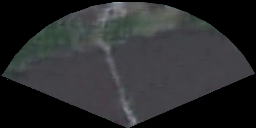

In [ ]:
test_img_path = 'test_00007.png'
test_img = cv2.imread(test_img_path)
cv2_imshow(test_img)

In [ ]:
def change_contrast_brightness(alpha, beta, im_path, mode = 'normal'):
    im = cv2.imread(im_path)
    new_im = np.zeros_like(im)

    if mode == 'normal':
        for y in range(im.shape[0]):
            for x in range(im.shape[1]):
                for c in range(im.shape[2]):
                    new_im[y,x,c] = np.clip(alpha*im[y,x,c] + beta, 0, 255)

    elif mode == 'gimp':
        if beta != 0:
            if beta > 0:
                shadow = beta
                hlight = 255
            else:
                shadow = 0
                hlight = 255 + beta
            alpha_b = (hlight - shadow)/255
            gamma_b = shadow

            new_im = cv2.addWeighted(im, alpha_b, im, 0, gamma_b)
        else:
            new_im = im.copy()

        if alpha != 0:
            f = 131*(alpha + 127)/(127*(131-alpha))
            alpha_c = f
            gamma_c = 127*(1-f)
        
        new_im = cv2.addWeighted(new_im, alpha_c, new_im, 0, gamma_c)
    
    return new_im

In [ ]:
def canny(image, sigma=0.33):
    v = np.median(image)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)
    return edged

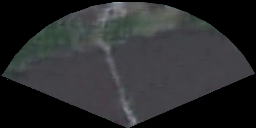

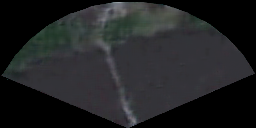

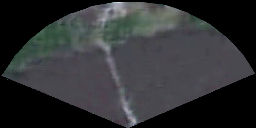

In [ ]:
alpha = 1.5
beta = -50
mode = 'normal'

test_img_contr_norm = change_contrast_brightness(1.4, -20, test_img_path, mode)
test_img_contr_gimp = change_contrast_brightness(8, -25, test_img_path, 'gimp')

cv2_imshow(test_img)
cv2_imshow(test_img_contr_gimp)
cv2_imshow(test_img_contr_norm)

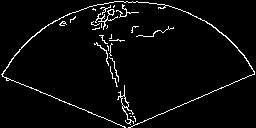

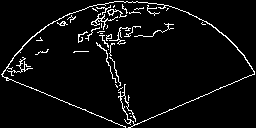

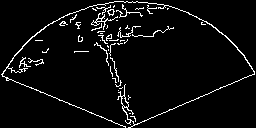

In [ ]:
test_img_edge = canny(test_img)
edge_contr_norm = canny(test_img_contr_norm)
edge_contr_gimp = canny(test_img_contr_gimp, 0.4)
cv2_imshow(test_img_edge)
cv2_imshow(edge_contr_gimp)
cv2_imshow(edge_contr_norm)

In [ ]:
param_array = [0.1*x for x in range(1, 10)]
print(param_array)

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9]


In [ ]:
for param in param_array:
    edge_img = canny(test_img, param)
    cv2_imshow(edge_img)

In [ ]:
edge_dir_path = '/content/drive/MyDrive/Image Dehazing for Video surveillance/executions/canny_edge'
gimp_edge_dir = '/content/drive/MyDrive/Image Dehazing for Video surveillance/executions/canny_edge_gimp'
norm_edge_dir = '/content/drive/MyDrive/Image Dehazing for Video surveillance/executions/canny_edge_norm'
if not os.path.exists(edge_dir_path):
     os.mkdir(edge_dir_path)

In [ ]:
gimp_edge_dir = '/content/drive/MyDrive/Image Dehazing for Video surveillance/executions/canny_edge_gimp'
os.mkdir(gimp_edge_dir)

In [ ]:
norm_edge_dir = '/content/drive/MyDrive/Image Dehazing for Video surveillance/executions/canny_edge_norm'
os.mkdir(norm_edge_dir)

In [ ]:
gimp_img_path = '/content/drive/MyDrive/Image Dehazing for Video surveillance/executions/gimp_ims'
norm_img_path = '/content/drive/MyDrive/Image Dehazing for Video surveillance/executions/norm_ims'

In [ ]:
os.mkdir(gimp_img_path)
os.mkdir(norm_img_path)

In [ ]:
def save_contrast_images(file_list, contrast_mode, alpha, beta, file_dir):
    for im_file in file_list:
        contr_img = change_contrast_brightness(alpha, beta, im_file, contrast_mode)
        temp_im = im_file.replace(".png", "_{mode_name}.png".format(mode_name=contrast_mode))
        save_path = file_dir + '/' + temp_im
        cv2.imwrite(save_path, contr_img)

In [ ]:
norm_alpha = 1.4
norm_beta = -20

gimp_alpha = 8
gimp_beta = -25

save_contrast_images(file_list, 'normal', norm_alpha, norm_beta, norm_img_path)
save_contrast_images(file_list, 'gimp', gimp_alpha, gimp_beta, gimp_img_path)

In [ ]:
sigma = 0.3
for im_file in file_list:
    img = cv2.imread(im_file)
    print(im_file)
    edge_img = canny(img, sigma)
    save_path = edge_dir_path + '/' + im_file + '_canny_edge.png'
    cv2.imwrite(save_path, edge_img)

In [ ]:
for im_file in file_list:
    img = change_contrast_brightness(8, -25, im_file, 'gimp')
    print(im_file)
    edge_img = canny(img, sigma)
    save_path = edge_dir_path + '/' + im_file + '_canny_edge.png'
    cv2.imwrite(save_path, edge_img)

In [ ]:
for im_file in file_list:
    img = cv2.imread(im_file)
    print(im_file)
    edge_img = canny(img, sigma)
    save_path = edge_dir_path + '/' + im_file + '_canny_edge.png'
    cv2.imwrite(save_path, edge_img)